In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
df = pd.read_csv("/content/crop_yield_dataset.csv")
df

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
36515,2023-12-31,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,2023-12-31,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36517,2023-12-31,Tomato,Sandy,6.75,6.030148,80.000000,9.409497,50.0,36.0,30.0,0.000000,33.833333
36518,2023-12-31,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [ ]:
df.isna().sum()

,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0
Crop_Yield,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Soil_Type'].unique()

array(['Peaty', 'Loamy', 'Sandy', 'Saline', 'Clay'], dtype=object)

In [ ]:
df["Crop_Type"].unique()

array(['Wheat', 'Corn', 'Rice', 'Barley', 'Soybean', 'Cotton',
       'Sugarcane', 'Tomato', 'Potato', 'Sunflower'], dtype=object)

In [ ]:
df = df.drop("Date", axis=1)
df

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
...,...,...,...,...,...,...,...,...,...,...,...
36515,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36517,Tomato,Sandy,6.75,6.030148,80.000000,9.409497,50.0,36.0,30.0,0.000000,33.833333
36518,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [ ]:
# Drop rows with missing values (or fill them, if needed)
df = df.dropna()

# Step 2: Check for Duplicates
df = df.drop_duplicates()
df

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
...,...,...,...,...,...,...,...,...,...,...,...
36515,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36517,Tomato,Sandy,6.75,6.030148,80.000000,9.409497,50.0,36.0,30.0,0.000000,33.833333
36518,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [ ]:
X = df.drop(columns=["Crop_Yield"])  # Features
y = df["Crop_Yield"]  # Target

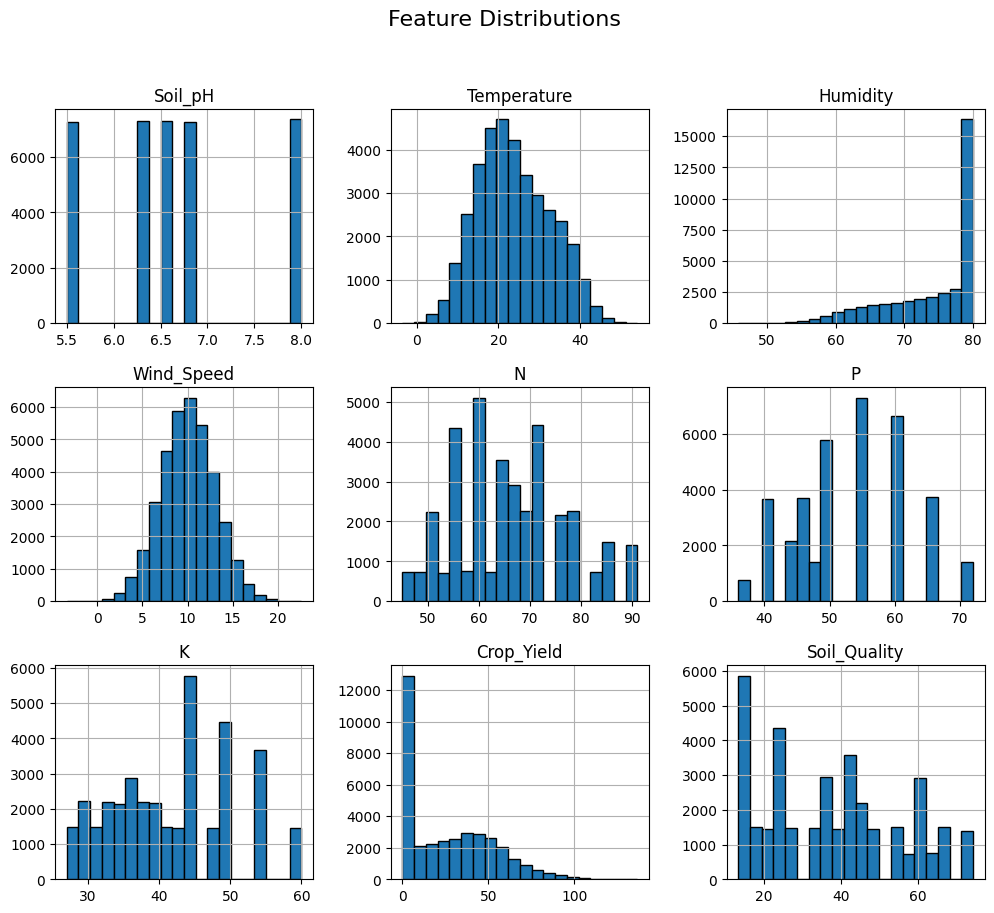

In [ ]:

# Step 3: Visualize the Data
# Histogram for distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [ ]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


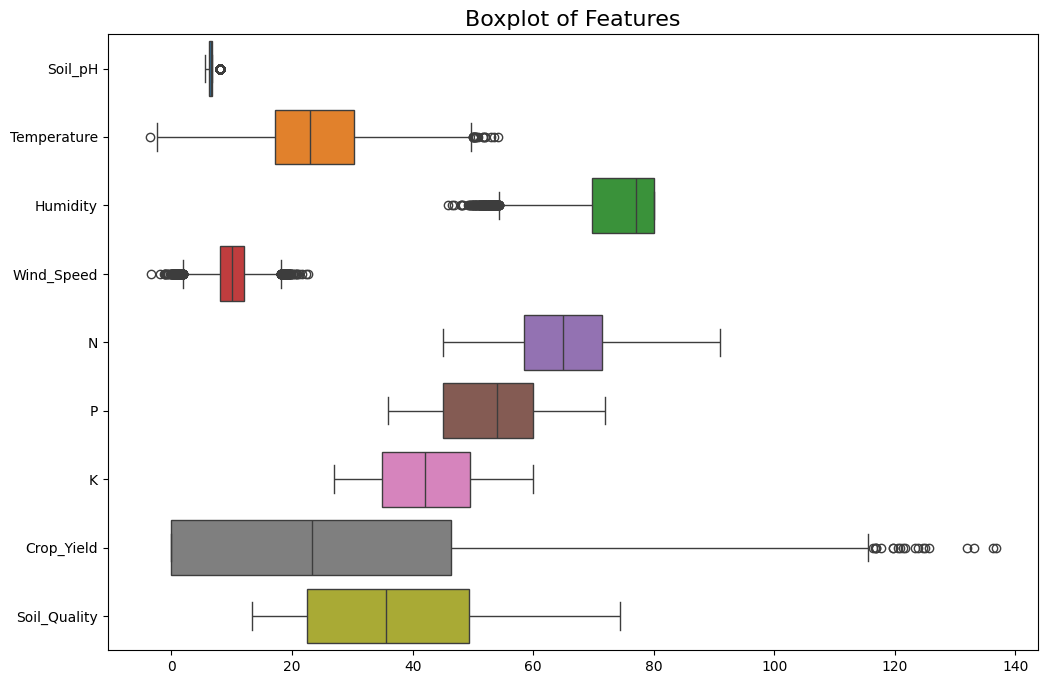

In [ ]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features', fontsize=16)
plt.show()

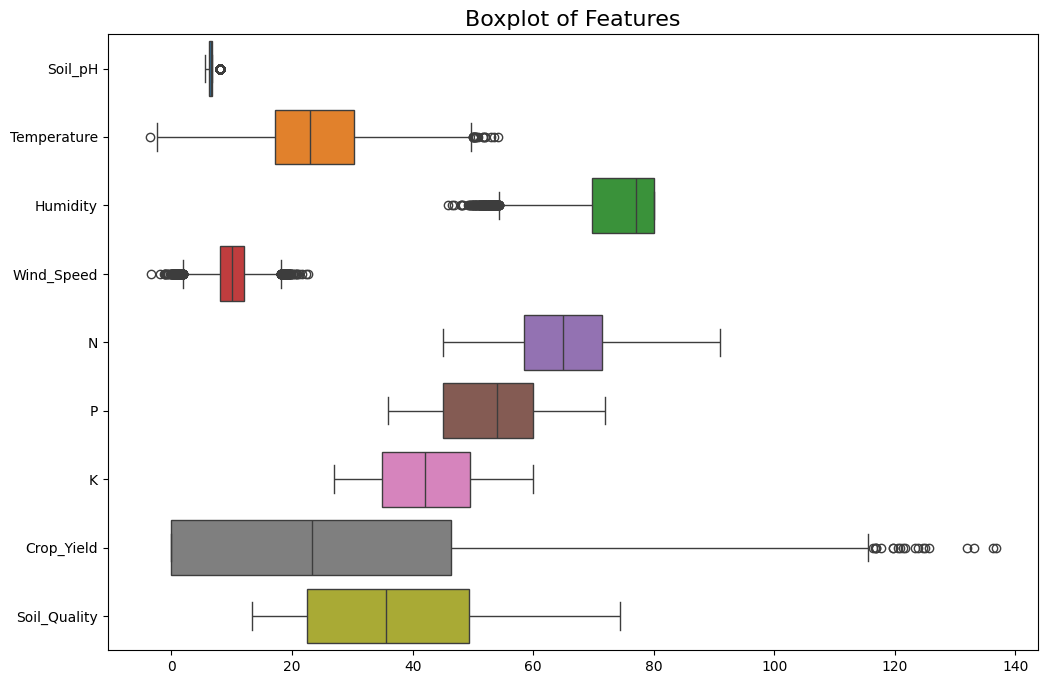

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features', fontsize=16)
plt.show()

In [ ]:
# Function to handle outliers using the IQR method
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                 # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower limit
        upper_bound = Q3 + 1.5 * IQR  # Upper limit

        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# List of numerical columns to check for outliers
numerical_columns = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Soil_Quality"]

# Apply the IQR method to handle outliers
df = handle_outliers_iqr(df, numerical_columns)
X = df.drop(columns=["Crop_Yield"])  # Features
y = df["Crop_Yield"]  # Target

#Define categorical columns and numerical columns
categorical_columns = ["Crop_Type", "Soil_Type"]
numerical_columns = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Soil_Quality"]


# Display the dataset after handling outliers
df.describe()



,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.501951,23.813393,74.265312,10.020081,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.652715,8.918489,6.739793,2.981811,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-2.460768,54.363130,1.906859,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,7.500000,49.884058,80.000000,18.117559,91.000000,72.000000,60.00000,136.711982,74.333333


In [ ]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.501951,23.813393,74.265312,10.020081,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.652715,8.918489,6.739793,2.981811,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-2.460768,54.363130,1.906859,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,7.500000,49.884058,80.000000,18.117559,91.000000,72.000000,60.00000,136.711982,74.333333


In [ ]:
# Step 4: Scale Numerical Features
# Scale numerical features dynamically
scaler = StandardScaler()
numerical_features = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Soil_Quality"] # Changed to a list
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,Wheat,Peaty,-1.535073,-1.611595,0.850882,0.314117,-0.506223,-0.909364,-1.231978,0.000000,-0.829428
1,Corn,Loamy,-0.002989,-0.421693,0.843081,-0.479079,1.652399,1.473544,0.934884,104.871310,1.646622
2,Rice,Peaty,-1.535073,-1.308569,0.850882,-0.936467,0.504196,0.111882,-0.412084,0.000000,-0.575232
3,Barley,Sandy,0.380032,-0.455414,0.850882,-2.460752,-1.470714,-1.476722,-1.407669,58.939796,-0.142159
4,Soybean,Peaty,-1.535073,-0.863723,0.850882,-0.779406,-1.516642,-0.909364,-0.412084,32.970413,-0.867086
...,...,...,...,...,...,...,...,...,...,...,...
36515,Cotton,Clay,-0.386010,-0.479330,0.850882,-2.130754,-0.001014,0.225354,0.700628,73.323885,0.665146
36516,Sugarcane,Peaty,-1.535073,-0.307798,0.692368,-0.410845,0.504196,0.111882,-0.002138,39.226521,-0.542281
36517,Tomato,Sandy,0.380032,-1.994002,0.850882,-0.204772,-1.470714,-1.930610,-1.407669,0.000000,-0.208062
36518,Potato,Peaty,-1.535073,-1.427821,0.850882,0.318363,-0.506223,-0.909364,-1.231978,6.067881,-0.829428


In [ ]:
df[numerical_features]

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Soil_Quality
0,-1.535073,-1.611595,0.850882,0.314117,-0.506223,-0.909364,-1.231978,-0.829428
1,-0.002989,-0.421693,0.843081,-0.479079,1.652399,1.473544,0.934884,1.646622
2,-1.535073,-1.308569,0.850882,-0.936467,0.504196,0.111882,-0.412084,-0.575232
3,0.380032,-0.455414,0.850882,-2.460752,-1.470714,-1.476722,-1.407669,-0.142159
4,-1.535073,-0.863723,0.850882,-0.779406,-1.516642,-0.909364,-0.412084,-0.867086
...,...,...,...,...,...,...,...,...
36515,-0.386010,-0.479330,0.850882,-2.130754,-0.001014,0.225354,0.700628,0.665146
36516,-1.535073,-0.307798,0.692368,-0.410845,0.504196,0.111882,-0.002138,-0.542281
36517,0.380032,-1.994002,0.850882,-0.204772,-1.470714,-1.930610,-1.407669,-0.208062
36518,-1.535073,-1.427821,0.850882,0.318363,-0.506223,-0.909364,-1.231978,-0.829428


In [ ]:
# Apply one-hot encoding to 'Crop_Type' and 'Soil_Type'

crop_yield_data = df.copy()
df2 = pd.get_dummies(crop_yield_data, columns=["Crop_Type", "Soil_Type"],  dtype=int)

# Display the first few rows of the encoded dataset
df2

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Crop_Type_Barley,...,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Clay,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,-1.535073,-1.611595,0.850882,0.314117,-0.506223,-0.909364,-1.231978,0.000000,-0.829428,0,...,0,0,0,0,1,0,0,1,0,0
1,-0.002989,-0.421693,0.843081,-0.479079,1.652399,1.473544,0.934884,104.871310,1.646622,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.535073,-1.308569,0.850882,-0.936467,0.504196,0.111882,-0.412084,0.000000,-0.575232,0,...,0,0,0,0,0,0,0,1,0,0
3,0.380032,-0.455414,0.850882,-2.460752,-1.470714,-1.476722,-1.407669,58.939796,-0.142159,1,...,0,0,0,0,0,0,0,0,0,1
4,-1.535073,-0.863723,0.850882,-0.779406,-1.516642,-0.909364,-0.412084,32.970413,-0.867086,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Step 4: Scale Numerical Features
scaler = StandardScaler()
numerical_features = ['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg']
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
# Step 5: Train-Test Split
X = df[numerical_features]
#Instead of trying to extract 'Crop_Yield' from df, use the y variable you created earlier
#y = df["Crop_Yield"]  # Assuming 'Crop_Yield' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Use the y variable you created earlier


In [ ]:
# Output preprocessed data and shapes
print("\nPreprocessed Data Sample:")
print(X_train.head())
print("\nShapes - X_train:", X_train.shape, ", X_test:", X_test.shape, ", y_train:", y_train.shape, ", y_test:", y_test.shape)


Preprocessed Data Sample:
        Soil_pH  Temperature  Humidity  Wind_Speed         N         P  \
12353 -1.535073     0.116689  0.130662   -0.704728 -1.011433 -0.909364   
13488  0.380032    -0.804744  0.850882    0.843450 -1.011433 -1.476722   
35370 -0.002989     0.235910 -0.027098   -0.484989  1.009405  0.792713   
16486  0.380032     0.856583 -0.848410   -1.308797 -0.092870 -0.568948   
31291 -0.386010     1.928213 -2.266453    0.758841  0.550124  0.225354   

              K  Crop_Yield  Soil_Quality  
12353 -0.822031   24.745758     -0.848257  
13488 -1.759052   35.891246     -0.109208  
35370  0.349245   30.100698      1.307695  
16486 -0.704904   21.903400      0.335634  
31291 -0.236393    0.000000      0.632195  

Shapes - X_train: (29216, 9) , X_test: (7304, 9) , y_train: (29216,) , y_test: (7304,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = '/content/crop_yield_dataset.csv'  # Update the file path
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(columns=["Date"], inplace=True)

# Drop rows with missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Handle outliers using the IQR method
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

numerical_columns = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Soil_Quality"]
df = handle_outliers_iqr(df, numerical_columns)
df3=df.copy()
# Apply one-hot encoding to 'Crop_Type' and 'Soil_Type'
scaler = StandardScaler()
numerical_features = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Soil_Quality"] # Changed to a list
df[numerical_features] = scaler.fit_transform(df[numerical_features])
crop_yield_data = df.copy()
df2 = pd.get_dummies(crop_yield_data, columns=["Crop_Type", "Soil_Type"],  dtype=int)

# Display the first few rows of the encoded dataset

# Define features and target
X = df2.drop(columns=["Crop_Yield"])  # Features
y = df["Crop_Yield"]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical columns

    ]
)



# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor( n_estimators = 50 ,               # Reduce the number of trees (fewer trees reduce overfitting but may increase variance)
                                    max_depth = 10 ,                  # Decrease the tree depth to make trees less complex
                                    min_samples_split = 10,           # Increase the minimum samples required to split an internal node
                                    min_samples_leaf = 5 ,            # Increase the minimum samples required at each leaf node
                                    max_features = 'log2',            # Reduce the number of features considered at each split
                                    bootstrap = True ,                # Keep bootstrap to reduce variance (helps prevent overfitting)
                                    random_state = 42))
                                  ])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Define a custom accuracy metric (e.g., predictions within ±10% of actual value are considered correct)
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    correct = np.abs(y_true - y_pred) <= (tolerance * y_true)
    return np.mean(correct)

# Calculate accuracy
accuracy = regression_accuracy(y_test, y_pred)


# Print metrics
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Accuracy (±10% tolerance): {accuracy:.2%}")




Mean Squared Error: 27.96
R^2 Score: 0.96
Accuracy (±10% tolerance): 32.20%


In [ ]:
df3.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.501951,23.813393,74.265312,10.020081,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.652715,8.918489,6.739793,2.981811,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-2.460768,54.363130,1.906859,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,7.500000,49.884058,80.000000,18.117559,91.000000,72.000000,60.00000,136.711982,74.333333


In [ ]:
y_pred_train = pipeline.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

accuracy = regression_accuracy(y_train, y_pred_train)

def regression_accuracy(y_true, y_pred_train, tolerance=0.1):
    correct = np.abs(y_true - y_pred_train) <= (tolerance * y_true)
    return np.mean(correct)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Accuracy (±10% tolerance): {accuracy:.2%}")



Mean Squared Error: 25.42
R^2 Score: 0.96
Accuracy (±10% tolerance): 34.01%


In [ ]:

# Save the pipeline
joblib.dump(pipeline, "crop_yield_pipeline2.pkl")
print("Pipeline saved as 'crop_yield_pipeline2.pkl'")


Pipeline saved as 'crop_yield_pipeline2.pkl'


Enter Soil pH: 6
Enter Temperature: 30
Enter Humidity: 65
Enter Wind Speed: 2
Enter Nitrogen (N): 60
Enter Phosphorus (P): 60
Enter Potassium (K): 30
Enter Soil Quality: 100
Enter Crop Type: Clay
Enter Soil Type: Sugarcane


In [ ]:
predi2[0]

45.92564129729789